<a href="https://colab.research.google.com/github/hbhb0311/Study/blob/main/Pytorch/PART2-DNN/ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [7]:
# nn layers -> 이 부분 차이를 둠 (ReLU 사용)
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [8]:
# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[ 0.3590,  1.9639,  0.6148,  ...,  0.8503, -0.6960, -0.2992],
        [-1.1002, -0.6664, -1.6742,  ..., -0.8107, -0.4905, -0.2566],
        [-0.1607,  0.1998,  0.6515,  ..., -1.3095,  0.5338,  1.2471],
        ...,
        [ 0.9562, -0.1019, -0.7464,  ...,  0.4633, -0.2642, -1.1937],
        [-1.7466,  0.5622,  0.2502,  ...,  2.4746, -1.1460, -0.5583],
        [ 0.0165,  0.6161, -1.1291,  ..., -0.9826,  0.8417,  0.6243]],
       requires_grad=True)

In [9]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
total_batch = len(data_loader)

for epoch in range(training_epochs):
    avg_cost = 0
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        # [batch_size, 1, 28, 28] = reshape => [batch_size, 784]
        
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
    print('Epoch: ', '%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 cost =  176.022064209
Epoch:  0002 cost =  42.907814026
Epoch:  0003 cost =  26.940000534
Epoch:  0004 cost =  18.616304398
Epoch:  0005 cost =  13.322464943
Epoch:  0006 cost =  9.861083984
Epoch:  0007 cost =  7.424013138
Epoch:  0008 cost =  5.478666306
Epoch:  0009 cost =  4.127374172
Epoch:  0010 cost =  3.148484468
Epoch:  0011 cost =  2.393435478
Epoch:  0012 cost =  1.923853278
Epoch:  0013 cost =  1.394524813
Epoch:  0014 cost =  1.133481860
Epoch:  0015 cost =  0.904763699


In [11]:
# grad 사용하지 않음
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

# relu와 adam 사용 전 정확도 0.8869 
# 비교했을 때 정확도 많이 상승했음을 확인 가능

Accuracy :  0.9513999819755554


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  8
Prediction:  8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


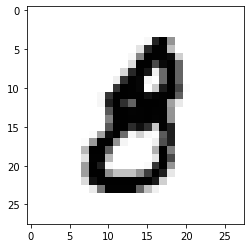

In [13]:
import matplotlib.pyplot as plt
import random

# get one and predict 

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r: r+1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r: r+1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r: r+1].view(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()